In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Add python module called MediaPipe
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 42.4 MB/s eta 0:00:00


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical

# Make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

In [7]:
# Checking TensorFlow version
tf.__version__

'2.15.0'

In [8]:
# Function to Extract Feature from images or frame
def extract_feature(input_image):
  mp_hands = mp.solutions.hands
  mp_drawing = mp.solutions.drawing_utils
  image = cv.imread(input_image)

  with mp_hands.Hands(static_image_mode=True, max_num_hands=2,
                      min_detection_confidence=0.1) as hands:

                      while True:
                        results = hands.process(cv.flip(cv.cvtColor(image,cv.COLOR_BGR2RGB), 1))
                        image_height, image_width, _ = image.shape

                        # Print handedness (left vs right hand)
                        #print(f'Handedness of {input_image}:')
                        #print(result.multi_handedness)

                        # Draw hand landmarks of each hand.
                        #print(f'Hand landmarks of {input_image}:')

                        if not results.multi_hand_landmarks:
                          # We will set whole landmarks into zero as no handpose detected

                          # Wrist hand
                          wristX = 0
                          wristY = 0
                          wristZ = 0

                          # Thumb finger
                          thumb_CmcX = 0
                          thumb_CmcY = 0
                          thumb_CmcZ = 0

                          thumb_McpX = 0
                          thumb_McpY = 0
                          thumb_McpZ = 0

                          thumb_IpX = 0
                          thumb_IpY = 0
                          thumb_IpZ = 0

                          thumb_TipX = 0
                          thumb_TipY = 0
                          thumb_TipZ = 0

                          # Index Finger
                          index_McpX = 0
                          index_McpY = 0
                          index_McpZ = 0

                          index_PipX = 0
                          index_PipY = 0
                          index_PipZ = 0

                          index_DipX = 0
                          index_DipY = 0
                          index_DipZ = 0

                          index_TipX = 0
                          index_TipY = 0
                          index_TipZ = 0

                          # Middle Finger
                          middle_McpX = 0
                          middle_McpY = 0
                          middle_McpZ = 0

                          middle_PipX = 0
                          middle_PipY = 0
                          middle_PipZ = 0

                          middle_DipX = 0
                          middle_DipY = 0
                          middle_DipZ = 0

                          middle_TipX = 0
                          middle_TipY = 0
                          middle_TipZ = 0

                          # Ring Finger
                          ring_McpX = 0
                          ring_McpY = 0
                          ring_McpZ = 0

                          ring_PipX = 0
                          ring_PipY = 0
                          ring_PipZ = 0

                          ring_DipX = 0
                          ring_DipY = 0
                          ring_DipZ = 0

                          ring_TipX = 0
                          ring_TipY = 0
                          ring_TipZ = 0

                          # Pinky Finger
                          pinky_McpX = 0
                          pinky_McpY = 0
                          pinky_McpZ = 0

                          pinky_PipX = 0
                          pinky_PipY = 0
                          pinky_PipZ = 0

                          pinky_DipX = 0
                          pinky_DipY = 0
                          pinky_DipZ = 0

                          pinky_TipX = 0
                          pinky_TipY = 0
                          pinky_TipZ = 0

                          # Set image to zero
                          annotated_image = 0

                          # Return whole landmark and image
                          return (wristX, wristY, wristZ,
                                  thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                                  thumb_McpX, thumb_McpY, thumb_McpZ,
                                  thumb_IpX, thumb_IpY, thumb_IpZ,
                                  thumb_TipX, thumb_TipY, thumb_TipZ,
                                  index_McpX, index_McpY, index_McpZ,
                                  index_PipX, index_PipY, index_PipZ,
                                  index_DipX, index_DipY, index_DipZ,
                                  index_TipX, index_TipY, index_TipZ,
                                  middle_McpX, middle_McpY, middle_McpZ,
                                  middle_PipX, middle_PipY, middle_PipZ,
                                  middle_DipX, middle_DipY, middle_DipZ,
                                  middle_TipX, middle_TipY, middle_TipZ,
                                  ring_McpX, ring_McpY, ring_McpZ,
                                  ring_PipX, ring_PipY, ring_PipZ,
                                  ring_DipX, ring_DipY, ring_DipZ,
                                  ring_TipX, ring_TipY, ring_TipZ,
                                  pinky_McpX, pinky_McpY, pinky_McpZ,
                                  pinky_PipX, pinky_PipY, pinky_PipZ,
                                  pinky_DipX, pinky_DipY, pinky_DipZ,
                                  pinky_TipX, pinky_TipY, pinky_TipZ,
                                  annotated_image)

                        annotated_image = cv.flip(image.copy(), 1)

                        for hand_landmarks in results.multi_hand_landmarks:
                          # Wrist hand
                          wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                          wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                          wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                          # Thumb finger
                          thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                          thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                          thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z

                          thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                          thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                          thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z

                          thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                          thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                          thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z

                          thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                          thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                          thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                          # Index Finger
                          index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                          index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                          index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z

                          index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                          index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                          index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z

                          index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                          index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                          index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z

                          index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                          index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                          index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                          # Middle Finger
                          middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                          middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                          middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z

                          middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                          middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                          middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z

                          middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                          middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                          middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z

                          middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                          middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                          middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                          # Ring Finger
                          ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                          ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                          ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z

                          ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                          ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                          ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z

                          ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                          ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                          ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z

                          ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                          ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                          ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                          # Pinky Finger
                          pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                          pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                          pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z

                          pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                          pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                          pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z

                          pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                          pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                          pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z

                          pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                          pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                          pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                          # Draw the skeleton
                          mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                          return (
                              wristX, wristY, wristZ,
                              thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                              thumb_McpX, thumb_McpY, thumb_McpZ,
                              thumb_IpX, thumb_IpY, thumb_IpZ,
                              thumb_TipX, thumb_TipY, thumb_TipZ,
                              index_McpX, index_McpY, index_McpZ,
                              index_PipX, index_PipY, index_PipZ,
                              index_DipX, index_DipY, index_DipZ,
                              index_TipX, index_TipY, index_TipZ,
                              middle_McpX, middle_McpY, middle_McpZ,
                              middle_PipX, middle_PipY, middle_PipZ,
                              middle_DipX, middle_DipY, middle_DipZ,
                              middle_TipX, middle_TipY, middle_TipZ,
                              ring_McpX, ring_McpY, ring_McpZ,
                              ring_PipX, ring_PipY, ring_PipZ,
                              ring_DipX, ring_DipY, ring_DipZ,
                              ring_TipX, ring_TipY, ring_TipZ,
                              pinky_McpX, pinky_McpY, pinky_McpZ,
                              pinky_PipX, pinky_PipY, pinky_PipZ,
                              pinky_DipX, pinky_DipY, pinky_DipZ,
                              pinky_TipX, pinky_TipY, pinky_TipZ,
                              annotated_image
                          )


In [9]:
# Function to create CSV fole or add dataset to existed CSV file
def toCSV(filecsv, class_type,
          wristX, wristY, wristZ,
          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
          thumb_McpX, thumb_McpY, thumb_McpZ,
          thumb_IpX, thumb_IpY, thumb_IpZ,
          thumb_TipX, thumb_TipY, thumb_TipZ,
          index_McpX, index_McpY, index_McpZ,
          index_PipX, index_PipY, index_PipZ,
          index_DipX, index_DipY, index_DipZ,
          index_TipX, index_TipY, index_TipZ,
          middle_McpX, middle_McpY, middle_McpZ,
          middle_PipX, middle_PipY, middle_PipZ,
          middle_DipX, middle_DipY, middle_DipZ,
          middle_TipX, middle_TipY, middle_TipZ,
          ring_McpX, ring_McpY, ring_McpZ,
          ring_PipX, ring_PipY, ring_PipZ,
          ring_DipX, ring_DipY, ring_DipZ,
          ring_TipX, ring_TipY, ring_TipZ,
          pinky_McpX, pinky_McpY, pinky_McpZ,
          pinky_PipX, pinky_PipY, pinky_PipZ,
          pinky_DipX, pinky_DipY, pinky_DipZ,
          pinky_TipX, pinky_TipY, pinky_TipZ):
  if os.path.isfile(filecsv):
    print("File exist thus shall write append to the file")
    with open(filecsv, 'a+', newline='') as file:
      # Create a writer object from csv module
      writer = csv.writer(file)
      writer.writerow([class_type,
                       wristX, wristY, wristZ,
                       thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                       thumb_McpX, thumb_McpY, thumb_McpZ,
                       thumb_IpX, thumb_IpY, thumb_IpZ,
                       thumb_TipX, thumb_TipY, thumb_TipZ,
                       index_McpX, index_McpY, index_McpZ,
                       index_PipX, index_PipY, index_PipZ,
                       index_DipX, index_DipY, index_DipZ,
                       index_TipX, index_TipY, index_TipZ,
                       middle_McpX, middle_McpY, middle_McpZ,
                       middle_PipX, middle_PipY, middle_PipZ,
                       middle_DipX, middle_DipY, middle_DipZ,
                       middle_TipX, middle_TipY, middle_TipZ,
                       ring_McpX, ring_McpY, ring_McpZ,
                       ring_PipX, ring_PipY, ring_PipZ,
                       ring_DipX, ring_DipY, ring_DipZ,
                       ring_TipX, ring_TipY, ring_TipZ,
                       pinky_McpX, pinky_McpY, pinky_McpZ,
                       pinky_PipX, pinky_PipY, pinky_PipZ,
                       pinky_DipX, pinky_DipY, pinky_DipZ,
                       pinky_TipX, pinky_TipY, pinky_TipZ])
  else:
    print("File not exist thus shall create new file as", filecsv)
    with open(filecsv, 'w', newline='') as file:
      # Create a writer object from csv module
      writer = csv.writer(file)
      writer.writerow(["class_type",
                       "wristX", "wristY", "wristZ",
                       "thumb_CmcX", "thumb_CmcY", "thumb_CmcZ",
                       "thumb_McpX", "thumb_McpY", "thumb_McpZ",
                       "thumb_IpX", "thumb_IpY", "thumb_IpZ",
                       "thumb_TipX", "thumb_TipY", "thumb_TipZ",
                       "index_McpX", "index_McpY", "index_McpZ",
                       "index_PipX", "index_PipY", "index_PipZ",
                       "index_DipX", "index_DipY", "index_DipZ",
                       "index_TipX", "index_TipY", "index_TipZ",
                       "middle_McpX", "middle_McpY", "middle_McpZ",
                       "middle_PipX", "middle_PipY", "middle_PipZ",
                       "middle_DipX", "middle_DipY", "middle_DipZ",
                       "middle_TipX", "middle_TipY", "middle_TipZ",
                       "ring_McpX", "ring_McpY", "ring_McpZ",
                       "ring_PipX", "ring_PipY", "ring_PipZ",
                       "ring_DipX", "ring_DipY", "ring_DipZ",
                       "ring_TipX", "ring_TipY", "ring_TipZ",
                       "pinky_McpX", "pinky_McpY", "pinky_McpZ",
                       "pinky_PipX", "pinky_PipY", "pinky_PipZ",
                       "pinky_DipX", "pinky_DipY", "pinky_DipZ",
                       "pinky_TipX", "pinky_TipY", "pinky_TipZ"])
      writer.writerow([class_type,
                       wristX, wristY, wristZ,
                       thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                       thumb_McpX, thumb_McpY, thumb_McpZ,
                       thumb_IpX, thumb_IpY, thumb_IpZ,
                       thumb_TipX, thumb_TipY, thumb_TipZ,
                       index_McpX, index_McpY, index_McpZ,
                       index_PipX, index_PipY, index_PipZ,
                       index_DipX, index_DipY, index_DipZ,
                       index_TipX, index_TipY, index_TipZ,
                       middle_McpX, middle_McpY, middle_McpZ,
                       middle_PipX, middle_PipY, middle_PipZ,
                       middle_DipX, middle_DipY, middle_DipZ,
                       middle_TipX, middle_TipY, middle_TipZ,
                       ring_McpX, ring_McpY, ring_McpZ,
                       ring_PipX, ring_PipY, ring_PipZ,
                       ring_DipX, ring_DipY, ring_DipZ,
                       ring_TipX, ring_TipY, ring_TipZ,
                       pinky_McpX, pinky_McpY, pinky_McpZ,
                       pinky_PipX, pinky_PipY, pinky_PipZ,
                       pinky_DipX, pinky_DipY, pinky_DipZ,
                       pinky_TipX, pinky_TipY, pinky_TipZ])

In [10]:
# Extract Feature for training
paths = "/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Dataset_baru/train"
csv_path = "hands_training.csv"

if os.path.exists(csv_path):
  print("CSV File does exist, going delete before start extraction and replace it with new")
  os.remove(csv_path)
else:
  print("CSV File does not exist", csv_path, ", Going create after extraction")

for dirlist in os.listdir(paths):
  for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
    print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
    for filename in filenames:
      if filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".png") or filename.endswith(".PNG"):
        # print(os.path.join(root, filename), True)
        (wristX, wristY, wristZ,
        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
        thumb_McpX, thumb_McpY, thumb_McpZ,
        thumb_IpX, thumb_IpY, thumb_IpZ,
        thumb_TipX, thumb_TipY, thumb_TipZ,
        index_McpX, index_McpY, index_McpZ,
        index_PipX, index_PipY, index_PipZ,
        index_DipX, index_DipY, index_DipZ,
        index_TipX, index_TipY, index_TipZ,
        middle_McpX, middle_McpY, middle_McpZ,
        middle_PipX, middle_PipY, middle_PipZ,
        middle_DipX, middle_DipY, middle_DipZ,
        middle_TipX, middle_TipY, middle_TipZ,
        ring_McpX, ring_McpY, ring_McpZ,
        ring_PipX, ring_PipY, ring_PipZ,
        ring_DipX, ring_DipY, ring_DipZ,
        ring_TipX, ring_TipY, ring_TipZ,
        pinky_McpX, pinky_McpY, pinky_McpZ,
        pinky_PipX, pinky_PipY, pinky_PipZ,
        pinky_DipX, pinky_DipY, pinky_DipZ,
        pinky_TipX, pinky_TipY, pinky_TipZ,
        annotated_image) = extract_feature(os.path.join(root, filename))

        if ((not wristX == 0) and (not wristY == 0)):
          toCSV(csv_path, dirlist,
                wristX, wristY, wristZ,
                thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                thumb_McpX, thumb_McpY, thumb_McpZ,
                thumb_IpX, thumb_IpY, thumb_IpZ,
                thumb_TipX, thumb_TipY, thumb_TipZ,
                index_McpX, index_McpY, index_McpZ,
                index_PipX, index_PipY, index_PipZ,
                index_DipX, index_DipY, index_DipZ,
                index_TipX, index_TipY, index_TipZ,
                middle_McpX, middle_McpY, middle_McpZ,
                middle_PipX, middle_PipY, middle_PipZ,
                middle_DipX, middle_DipY, middle_DipZ,
                middle_TipX, middle_TipY, middle_TipZ,
                ring_McpX, ring_McpY, ring_McpZ,
                ring_PipX, ring_PipY, ring_PipZ,
                ring_DipX, ring_DipY, ring_DipZ,
                ring_TipX, ring_TipY, ring_TipZ,
                pinky_McpX, pinky_McpY, pinky_McpZ,
                pinky_PipX, pinky_PipY, pinky_PipZ,
                pinky_DipX, pinky_DipY, pinky_DipZ,
                pinky_TipX, pinky_TipY, pinky_TipZ)

        else:
          print(os.path.join(root, filename), "Hand does not have landmarks")


Output streaming akan dipotong hingga 5000 baris terakhir.
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
Inside Folder Bantu Consist : 110 Imageset
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File 

In [11]:
# Extract Feature for validation
paths = "/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Dataset_baru/val"
csv_path = "hands_validation.csv"

if os.path.exists(csv_path):
  print("CSV File does exist, going delete before start extraction and replace it with new")
  os.remove(csv_path)
else:
  print("CSV File does not exist", csv_path, ", Going create after extraction")

for dirlist in os.listdir(paths):
  for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
    print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
    for filename in filenames:
      if filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".png") or filename.endswith(".PNG"):
        # print(os.path.join(root, filename), True)
        (wristX, wristY, wristZ,
        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
        thumb_McpX, thumb_McpY, thumb_McpZ,
        thumb_IpX, thumb_IpY, thumb_IpZ,
        thumb_TipX, thumb_TipY, thumb_TipZ,
        index_McpX, index_McpY, index_McpZ,
        index_PipX, index_PipY, index_PipZ,
        index_DipX, index_DipY, index_DipZ,
        index_TipX, index_TipY, index_TipZ,
        middle_McpX, middle_McpY, middle_McpZ,
        middle_PipX, middle_PipY, middle_PipZ,
        middle_DipX, middle_DipY, middle_DipZ,
        middle_TipX, middle_TipY, middle_TipZ,
        ring_McpX, ring_McpY, ring_McpZ,
        ring_PipX, ring_PipY, ring_PipZ,
        ring_DipX, ring_DipY, ring_DipZ,
        ring_TipX, ring_TipY, ring_TipZ,
        pinky_McpX, pinky_McpY, pinky_McpZ,
        pinky_PipX, pinky_PipY, pinky_PipZ,
        pinky_DipX, pinky_DipY, pinky_DipZ,
        pinky_TipX, pinky_TipY, pinky_TipZ,
        annotated_image) = extract_feature(os.path.join(root, filename))

        if ((not wristX == 0) and (not wristY == 0)):
          toCSV(csv_path, dirlist,
                wristX, wristY, wristZ,
                thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                thumb_McpX, thumb_McpY, thumb_McpZ,
                thumb_IpX, thumb_IpY, thumb_IpZ,
                thumb_TipX, thumb_TipY, thumb_TipZ,
                index_McpX, index_McpY, index_McpZ,
                index_PipX, index_PipY, index_PipZ,
                index_DipX, index_DipY, index_DipZ,
                index_TipX, index_TipY, index_TipZ,
                middle_McpX, middle_McpY, middle_McpZ,
                middle_PipX, middle_PipY, middle_PipZ,
                middle_DipX, middle_DipY, middle_DipZ,
                middle_TipX, middle_TipY, middle_TipZ,
                ring_McpX, ring_McpY, ring_McpZ,
                ring_PipX, ring_PipY, ring_PipZ,
                ring_DipX, ring_DipY, ring_DipZ,
                ring_TipX, ring_TipY, ring_TipZ,
                pinky_McpX, pinky_McpY, pinky_McpZ,
                pinky_PipX, pinky_PipY, pinky_PipZ,
                pinky_DipX, pinky_DipY, pinky_DipZ,
                pinky_TipX, pinky_TipY, pinky_TipZ)

        else:
          print(os.path.join(root, filename), "Hand does not have landmarks")


CSV File does not exist hands_validation.csv , Going create after extraction
Inside Folder A Consist : 20 Imageset
File not exist thus shall create new file as hands_validation.csv
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Dataset_baru/val/A/Copy of A_88.jpg Hand does not have landmarks
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
File exist thus shall write append to the file
/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Dataset_baru/val/A/Copy of A_121.jpg Hand does not have landmarks
File exist thus shall write append to the file
/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Dataset_baru/val/A/Copy of A_103.jpg Hand does not ha

In [12]:
# Read CSV file for Training the model using Pandas
df_train = pd.read_csv("hands_training.csv", header=0)

# Sort the values of the dataset according to the Alphabets
df_train = df_train.sort_values(by=["class_type"])

df_train

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,1,637.341789,910.056746,-1.824747e-07,612.296177,868.220386,-0.050291,619.386471,813.391356,-0.079073,...,-0.055467,795.005527,808.335776,-0.085382,758.885873,842.937649,-0.077119,735.183522,846.434986,-0.064857
80,1,819.421769,1072.347400,-4.164915e-09,756.895849,1030.631605,-0.014119,721.515535,979.342040,-0.036765,...,-0.065813,789.514507,980.841405,-0.082264,777.085591,1013.269993,-0.072188,797.886965,1026.367152,-0.061198
79,1,827.801888,1067.294397,-3.141490e-08,769.559585,1025.441116,-0.012819,734.322121,973.703552,-0.033644,...,-0.063061,804.643853,975.895504,-0.077613,794.372049,1005.572692,-0.067673,817.668090,1015.177080,-0.057320
78,1,828.378400,1075.436433,2.358708e-08,767.298859,1032.142344,-0.012517,732.036233,981.861833,-0.035494,...,-0.065335,794.200368,980.670961,-0.079986,784.163721,1013.864100,-0.069629,805.497989,1027.120169,-0.058925
77,1,839.556847,1082.156639,5.861259e-08,768.636773,1034.557581,-0.013307,731.652489,979.551143,-0.037150,...,-0.066607,790.445832,985.803568,-0.081345,782.317090,1017.845213,-0.071559,803.909698,1031.154595,-0.061131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,Z,23.850682,47.703612,6.790106e-07,18.978839,43.826973,-0.062279,17.850906,36.752656,-0.086646,...,-0.012136,34.732699,25.369638,-0.034953,37.645316,22.404470,-0.045600,40.255395,19.542512,-0.052098
2043,Z,47.412968,30.777580,9.090124e-07,57.203829,29.734352,0.004569,64.589465,24.832788,-0.010189,...,-0.116696,68.081492,18.649106,-0.146542,73.626584,18.045230,-0.151781,78.888041,17.622352,-0.154002
2042,Z,47.412968,30.777580,9.090124e-07,57.203829,29.734352,0.004569,64.589465,24.832788,-0.010189,...,-0.116696,68.081492,18.649106,-0.146542,73.626584,18.045230,-0.151781,78.888041,17.622352,-0.154002
2012,Z,286.989002,274.060802,-5.332062e-07,262.026176,259.979820,0.002845,235.275326,244.086075,-0.000918,...,-0.025041,221.692696,228.426647,-0.032540,216.777992,236.520424,-0.029591,214.001141,238.266621,-0.025580


In [13]:
# Read CSV file for Validation the model using Pandas
df_test = pd.read_csv("hands_validation.csv", header=0)

# Sort the values of the dataset according to the Alphabets
df_test = df_test.sort_values(by=["class_type"])

df_test

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
445,1,1012.891013,976.171392,-1.394805e-07,971.908847,943.458418,-0.014117,941.488688,879.409246,-0.024779,...,-0.040556,1044.602131,871.353776,-0.055103,1026.312914,899.792044,-0.050276,1035.571887,907.157875,-0.043797
435,1,629.968253,900.769063,-2.086302e-07,605.676290,856.698633,-0.044109,614.004161,798.185619,-0.069863,...,-0.053994,786.898781,795.140051,-0.081742,751.491286,826.408871,-0.073375,729.197583,829.693919,-0.061150
434,1,785.546202,800.107955,-6.970830e-08,730.755999,767.175346,-0.020955,687.704200,694.787900,-0.044675,...,-0.061560,811.687500,640.492853,-0.086802,789.594583,691.377709,-0.073574,806.276298,714.643925,-0.056526
438,1,934.870732,1120.116845,6.434186e-08,848.136491,1074.130821,-0.002921,797.631645,1013.037404,-0.023644,...,-0.072714,759.720817,1026.931885,-0.088813,770.645243,1057.798070,-0.081038,807.365283,1059.470168,-0.073969
439,1,1074.368265,1014.450424,-2.113758e-07,1042.122301,981.222561,-0.016409,1031.076294,927.613104,-0.026173,...,-0.029843,1153.082253,915.479726,-0.044804,1126.230199,943.329568,-0.038084,1115.789117,952.333018,-0.029583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Z,774.410217,478.641479,6.205091e-07,937.700073,470.714417,-0.003200,1086.611572,403.152283,-0.004914,...,-0.030199,1169.328003,364.322113,-0.047761,1255.104858,367.784698,-0.058971,1334.120850,367.329132,-0.066914
416,Z,774.410217,478.641479,6.205091e-07,937.700073,470.714417,-0.003200,1086.611572,403.152283,-0.004914,...,-0.030199,1169.328003,364.322113,-0.047761,1255.104858,367.784698,-0.058971,1334.120850,367.329132,-0.066914
433,Z,379.901505,210.415421,-2.281907e-07,414.850769,194.085369,-0.004057,443.033180,172.981586,-0.014682,...,-0.044945,434.059868,156.946945,-0.056189,445.953827,158.987188,-0.053125,455.513344,158.118515,-0.049365
423,Z,409.419250,258.292351,2.945335e-07,416.362801,245.060654,-0.023389,430.415573,224.212437,-0.029565,...,0.014002,464.018478,216.769409,0.007774,477.011604,219.221306,0.004927,489.887695,219.874725,0.003908


In [14]:
# Put categorical using Pandas
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_test["class_type"] = pd.Categorical(df_test["class_type"])
df_test["class_type"] = df_test.class_type.cat.codes

In [15]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_test = df_test.pop("class_type")
x_test = df_test.copy()

# Copied features turn to array by using numpy
x_train = np.array(x_train)
x_test = np.array(x_test)

In [16]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(8645, 63)
(1626, 63)
(8645, 63, 1)
(1626, 63, 1)


In [17]:
# Check sample train and test features
print(x_train[0])
print(x_test[5])

[[637.342]
 [910.057]
 [ -0.   ]
 [612.296]
 [868.22 ]
 [ -0.05 ]
 [619.386]
 [813.391]
 [ -0.079]
 [682.735]
 [790.73 ]
 [ -0.102]
 [739.225]
 [770.269]
 [ -0.12 ]
 [647.124]
 [691.606]
 [ -0.058]
 [658.172]
 [593.253]
 [ -0.1  ]
 [661.621]
 [530.038]
 [ -0.127]
 [667.937]
 [473.692]
 [ -0.146]
 [701.674]
 [715.882]
 [ -0.051]
 [730.235]
 [722.833]
 [ -0.1  ]
 [698.376]
 [784.956]
 [ -0.108]
 [680.071]
 [797.268]
 [ -0.105]
 [741.925]
 [755.792]
 [ -0.05 ]
 [765.28 ]
 [769.628]
 [ -0.092]
 [724.363]
 [819.004]
 [ -0.078]
 [704.064]
 [819.722]
 [ -0.061]
 [769.747]
 [800.341]
 [ -0.055]
 [795.006]
 [808.336]
 [ -0.085]
 [758.886]
 [842.938]
 [ -0.077]
 [735.184]
 [846.435]
 [ -0.065]]
[[629.968]
 [900.769]
 [ -0.   ]
 [605.676]
 [856.699]
 [ -0.044]
 [614.004]
 [798.186]
 [ -0.07 ]
 [677.903]
 [775.934]
 [ -0.091]
 [733.924]
 [760.078]
 [ -0.109]
 [644.198]
 [684.283]
 [ -0.051]
 [655.792]
 [584.787]
 [ -0.09 ]
 [659.833]
 [522.724]
 [ -0.115]
 [666.527]
 [467.214]
 [ -0.134]
 [696.596

In [18]:
# Number of classes according standard Indonesian Language
num_classes = 87

# Using keras.utils to put the label categorically
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [19]:
# Model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'),
    tf.keras.layers.Conv1D(filters= 64, kernel_size=3, strides=1, padding='causal', activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 63, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 32)            0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 64)            6208      
                                                                 
 conv1d_3 (Conv1D)           (None, 31, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                   

In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_path = '/content/drive/MyDrive/Bangkit/saved_model/model-{epoch:02d}-{val_accuracy:.4f}.h5'

checkpoint = ModelCheckpoint(
    filepath = model_path,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    verbose = 1
)

In [23]:
#callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                             patience=10,
#                                             verbose=1,
#                                             restore_best_weights=False)

# Train the model
model.fit(x_train,
          y_train,
          epochs=150,
          batch_size=32,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint])


Epoch 1/150
269/271 [============================>.] - ETA: 0s - loss: 0.0601 - accuracy: 0.9844
Epoch 1: val_accuracy did not improve from 0.82964
271/271 [==============================] - 2s 8ms/step - loss: 0.0598 - accuracy: 0.9845 - val_loss: 2.5903 - val_accuracy: 0.8124
Epoch 2/150
264/271 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.9897
Epoch 2: val_accuracy did not improve from 0.82964
271/271 [==============================] - 2s 7ms/step - loss: 0.0423 - accuracy: 0.9897 - val_loss: 2.7716 - val_accuracy: 0.8137
Epoch 3/150
268/271 [============================>.] - ETA: 0s - loss: 0.0410 - accuracy: 0.9903
Epoch 3: val_accuracy did not improve from 0.82964
271/271 [==============================] - 2s 7ms/step - loss: 0.0408 - accuracy: 0.9904 - val_loss: 2.7375 - val_accuracy: 0.8155
Epoch 4/150
265/271 [============================>.] - ETA: 0s - loss: 0.0321 - accuracy: 0.9916
Epoch 4: val_accuracy did not improve from 0.82964
271/271 [======

In [24]:
loss,acc = model.evaluate(x_train, y_train, verbose=0)

print('The accuracy of the model for training data is: ', acc*100)
print('The Loss of the model for training data is: ', loss)

loss,acc = model.evaluate(x_test, y_test, verbose=0)

print('The accuracy of the model for validation data is: ', acc*100)
print('The Loss of the model for validation data is: ', loss)

The accuracy of the model for training data is:  99.73394870758057
The Loss of the model for training data is:  0.010977056808769703
The accuracy of the model for validation data is:  81.54981732368469
The Loss of the model for validation data is:  2.9184536933898926


In [25]:
# Hard Encode for the prediction
classes = {
    '1' : 0,
    '10' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '5' : 5,
    '6' : 6,
    '7' : 7,
    '8' : 8,
    '9' : 9,
    'A' : 10,
    'Ada' : 11,
    'Aku' : 12,
    'Apa' : 13,
    'Ayah' : 14,
    'B' : 15,
    'Baik' : 16,
    'Bantu' : 17,
    'Benci' : 18,
    'Bercanda' : 19,
    'Bisa' : 20,
    'C' : 21,
    'Cinta' : 22,
    'D' : 23,
    'Dia' : 24,
    'Dimana' : 25,
    'E' : 26,
    'F' : 27,
    'G' : 28,
    'H' : 29,
    'Halo' : 30,
    'I' : 31,
    'Ingin' : 32,
    'Ini' : 33,
    'J' : 34,
    'Jalan-jalan': 35,
    'Jam' : 36,
    'Jangan' : 37,
    'K' : 38,
    'Kakak' : 39,
    'Kamu' : 40,
    'Kangen' : 41,
    'Kapan' : 42,
    'Keadaan' : 43,
    'Kenapa' : 44,
    'Keren' : 45,
    'Kerja' : 46,
    'L' : 47,
    'Lihat' : 48,
    'M' : 49,
    'Maaf' : 50,
    'Main' : 51,
    'Malam' : 52,
    'Malas' : 53,
    'Malu' : 54,
    'Marah' : 55,
    'Minta' : 56,
    'Minum' : 57,
    'N' : 58,
    'O' : 59,
    'P' : 60,
    'Pagi' : 61,
    'Q' : 62,
    'R' : 63,
    'Rumah' : 64,
    'S' : 65,
    'Sabar' : 66,
    'Sakit' : 67,
    'Salah' : 68,
    'Sama-sama' : 69,
    'Sayang' : 70,
    'Sedih' : 71,
    'Sekolah' : 72,
    'Semangat' : 73,
    'Senang' : 74,
    'Siang' : 75,
    'Siapa' : 76,
    'Suka' : 77,
    'T' : 78,
    'Terima kasih' : 79,
    'Tolong' : 80,
    'U' : 81,
    'V' : 82,
    'W' : 83,
    'X' : 84,
    'Y' : 85,
    'Z' : 86
}

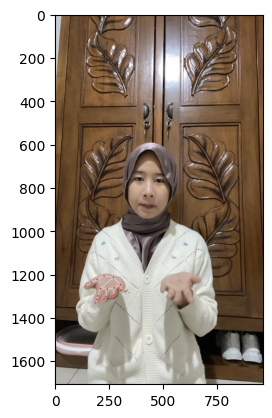

In [26]:
# Directly from Imageset Dataset Testing
# Load Image and do Feature Extraction
path_to_image = "/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Dataset/train_4/val/Apa/apa_643.jpg"

(wristX, wristY, wristZ,
 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
 thumb_McpX, thumb_McpY, thumb_McpZ,
 thumb_IpX, thumb_IpY, thumb_IpZ,
 thumb_TipX, thumb_TipY, thumb_TipZ,
 index_McpX, index_McpY, index_McpZ,
 index_PipX, index_PipY, index_PipZ,
 index_DipX, index_DipY, index_DipZ,
 index_TipX, index_TipY, index_TipZ,
 middle_McpX, middle_McpY, middle_McpZ,
 middle_PipX, middle_PipY, middle_PipZ,
 middle_DipX, middle_DipY, middle_DipZ,
 middle_TipX, middle_TipY, middle_TipZ,
 ring_McpX, ring_McpY, ring_McpZ,
 ring_PipX, ring_PipY, ring_PipZ,
 ring_DipX, ring_DipY, ring_DipZ,
 ring_TipX, ring_TipY, ring_TipZ,
 pinky_McpX, pinky_McpY, pinky_McpZ,
 pinky_PipX, pinky_PipY, pinky_PipZ,
 pinky_DipX, pinky_DipY, pinky_DipZ,
 pinky_TipX, pinky_TipY, pinky_TipZ,
 output_IMG) = extract_feature(path_to_image)

plt.axis("on")
plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [27]:
# Shape the image features into an 1x3 array
input_IMG = np.array([[[wristX], [wristY], [wristZ],
                       [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                       [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                       [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                       [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                       [index_McpX], [index_McpY], [index_McpZ],
                       [index_PipX], [index_PipY], [index_PipZ],
                       [index_DipX], [index_DipY], [index_DipZ],
                       [index_TipX], [index_TipY], [index_TipZ],
                       [middle_McpX], [middle_McpY], [middle_McpZ],
                       [middle_PipX], [middle_PipY], [middle_PipZ],
                       [middle_DipX], [middle_DipY], [middle_DipZ],
                       [middle_TipX], [middle_TipY], [middle_TipZ],
                       [ring_McpX], [ring_McpY], [ring_McpZ],
                       [ring_PipX], [ring_PipY], [ring_PipZ],
                       [ring_DipX], [ring_DipY], [ring_DipZ],
                       [ring_TipX], [ring_TipY], [ring_TipZ],
                       [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                       [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                       [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                       [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])

print(input_IMG.shape)
print(input_IMG)




(1, 63, 1)
[[[ 269.545]
  [1215.454]
  [   0.   ]
  [ 226.25 ]
  [1208.668]
  [  -0.03 ]
  [ 194.084]
  [1223.249]
  [  -0.052]
  [ 169.175]
  [1240.38 ]
  [  -0.071]
  [ 142.639]
  [1255.056]
  [  -0.092]
  [ 210.685]
  [1266.364]
  [  -0.066]
  [ 197.665]
  [1300.1  ]
  [  -0.094]
  [ 193.202]
  [1317.98 ]
  [  -0.112]
  [ 187.799]
  [1332.599]
  [  -0.126]
  [ 241.644]
  [1270.675]
  [  -0.066]
  [ 234.142]
  [1303.073]
  [  -0.097]
  [ 228.292]
  [1312.207]
  [  -0.115]
  [ 221.601]
  [1317.214]
  [  -0.128]
  [ 272.749]
  [1263.706]
  [  -0.068]
  [ 272.154]
  [1294.46 ]
  [  -0.097]
  [ 267.861]
  [1300.566]
  [  -0.111]
  [ 261.039]
  [1301.63 ]
  [  -0.12 ]
  [ 301.268]
  [1249.19 ]
  [  -0.071]
  [ 308.471]
  [1271.44 ]
  [  -0.098]
  [ 307.414]
  [1275.546]
  [  -0.109]
  [ 303.828]
  [1275.759]
  [  -0.117]]]


In [28]:
# Print the prediction
print(model.predict(input_IMG))
print(np.argmax(model.predict(input_IMG), axis=1))

1/1 [==============================] - 0s 465ms/step
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.503 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.497 0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.   ]]
1/1 [==============================] - 0s 18ms/step
[13]


In [29]:
# Print prediction using define classes
predictions = np.argmax(model.predict(input_IMG), axis=1)
for alphabets, values in classes.items():
  if values == predictions[0]:
    print("Possible prediction according to the input: ", alphabets)

1/1 [==============================] - 0s 27ms/step
Possible prediction according to the input:  Apa


In [30]:
# Saving the model into H5 system file
save_model = "model.h5"
model.save(save_model)
print("Model save into ", save_model)

Model save into  model.h5


# Convert .h5 model into tflite model

In [31]:
import tensorflow as tf
import os

In [32]:
# convert keras model to tflite
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [33]:
from keras.models import load_model
model = load_model("/content/model.h5")

TF_LITE_MODEL_FILE_NAME = "tflite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('tflite_model_another.tflite', 'wb') as f:
  f.write(tflite_model)

File size: 2484.125 Kilobytes
